# Validating modelled tide heights

**This guide demonstrates how to use the [`load_gauge_gesla`](../../api/#eo_tides.validation.load_gauge_gesla) function from [`eo_tides.stats`](../../api/#eo_tides.validation) to validate modelled tides from `eo-tides` using tide gauge data.**

The tide models used by `eo-tides` can vary significantly in accuracy across the world's coastlines. 
Evaluating the accuracy of your modelled tides is critical for ensuring that resulting marine or coastal EO analyses are reliable and useful.

The `load_gauge_gesla` function provides a convenient tool for loading high-quality sea-level measurements from the [GESLA Global Extreme Sea Level Analysis archive](https://gesla.org/) – a global archive of almost 90,713 years of sea level data from 5,119 records across the world. This data can be used to compare against tides modelled using `eo-tides` to calculate the accuracy of your tide modelling and identify the optimal tide models to use for your study area.


## Getting started
As in the previous examples, our first step is to tell `eo-tides` the location of our tide model directory (if you haven't set this up, [refer to the setup instructions here](../../setup)):

In [1]:
directory = "../../tests/data/tide_models/"

## Example modelled tides
First, we can model hourly tides for a location (**Broome, Western Australia**) and time period (**January 2018**) of interest using the `eo_tides.model.model_tides` function:

In [2]:
from eo_tides.model import model_tides
import pandas as pd

x, y = 122.2186, -18.0008
start_time = "2018-01-01"
end_time = "2018-01-31"

modelled_df = model_tides(
    x=x,
    y=y,
    time=pd.date_range(start=start_time, end=end_time, freq="1h"),
    directory=directory,
)

# Print outputs
modelled_df.head()

Modelling tides using EOT20


,,,tide_model,tide_height
time,x,y,,
2018-01-01 00:00:00,122.2186,-18.0008,EOT20,1.229286
2018-01-01 01:00:00,122.2186,-18.0008,EOT20,2.162897
2018-01-01 02:00:00,122.2186,-18.0008,EOT20,2.476600
2018-01-01 03:00:00,122.2186,-18.0008,EOT20,2.112390
2018-01-01 04:00:00,122.2186,-18.0008,EOT20,1.181283


## Loading GESLA tide gauge data

To evaluate the accuracy of these modelled tides, we can load measured sea-level data from the nearest GESLA tide gauge using `load_gauge_gesla`.

To obtain GESLA data, you will need to download both **"GESLA-3 data"** and **"GESLA-3 CSV META-DATA FILE"** from the [Downloads page of the GESLA website](), and save these to a convenient location. 

We have provided an example below; replace these paths to point to your downloaded data.

In [3]:
gesla_data_path = "../../tests/data/"
gesla_metadata_path = "../../tests/data/GESLA3_ALL 2.csv"

To load GESLA measured sea-level data for our location, we can pass in the same `x` and `y` location and time period that we used to originally model our tides. 
This will ensure that we load only the gauge data we actually need.

<div class="admonition tip">
    <p class="admonition-title">Tip</p>
    <p>
        The <code>load_gauge_gesla</code> function will automatically identify the nearest GESLA tide gauge to an <code>x</code>, <code>y</code> coordinate; pass a set of bounding box tuples (e.g. <code>x=(120, 130), y=(-20, -30)</code> to return all tide gauges within a bounding box instead.
    </p>
</div>

In [4]:
from eo_tides.validation import load_gauge_gesla

# Load gauge data
gauge_df = load_gauge_gesla(
    x=x,
    y=y,
    time=(start_time, end_time),
    correct_mean=True,
    data_path=gesla_data_path,
    metadata_path=gesla_metadata_path,
)
gauge_df.head()

sea_level  qc_flag  use_flag  \
site_code time                                                
62650     2018-01-01 00:00:00   1.208329        1         1   
          2018-01-01 01:00:00   2.311329        1         1   
          2018-01-01 02:00:00   2.712329        1         1   
          2018-01-01 03:00:00   2.137329        1         1   
          2018-01-01 04:00:00   1.049329        1         1   

                                                           file_name  \
site_code time                                                         
62650     2018-01-01 00:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 01:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 02:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 03:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 04:00:00  ../../tests/data/broome-62650-aus-bom   

                              site_name country contributor_abbreviated  \
site_code time                                                            
62650     2018-01-01 00:00:00    Broome     AUS                     BOM   
          2018-01-01 01:00:00    Broome     AUS                     BOM   
          2018-01-01 02:00:00    Broome     AUS                     BOM   
          2018-01-01 03:00:00    Broome     AUS                     BOM   
          2018-01-01 04:00:00    Broome     AUS                     BOM   

                                    contributor_full  \
site_code time                                         
62650     2018-01-01 00:00:00  Bureau of Meteorology   
          2018-01-01 01:00:00  Bureau of Meteorology   
          2018-01-01 02:00:00  Bureau of Meteorology   
          2018-01-01 03:00:00  Bureau of Meteorology   
          2018-01-01 04:00:00  Bureau of Meteorology   

                                                             contributor_website  \
site_code time                                                                     
62650     2018-01-01 00:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 01:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 02:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 03:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 04:00:00  http://www.bom.gov.au/oceanography/projects/nt...   

                              contributor_contact  ... start_date_time  \
site_code time                                     ...                   
62650     2018-01-01 00:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 01:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 02:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 03:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 04:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   

                                  end_date_time number_of_years  \
site_code time                                                    
62650     2018-01-01 00:00:00  31/12/2019 23:00              51   
          2018-01-01 01:00:00  31/12/2019 23:00              51   
          2018-01-01 02:00:00  31/12/2019 23:00              51   
          2018-01-01 03:00:00  31/12/2019 23:00              51   
          2018-01-01 04:00:00  31/12/2019 23:00              51   

                               time_zone_hours  \
site_code time                                   
62650     2018-01-01 00:00:00                0   
          2018-01-01 01:00:00                0   
          2018-01-01 02:00:00                0   
          2018-01-01 03:00:00                0   
          2018-01-01 04:00:00                0   

                                                    datum_information  \
site_code time                                                          
62650     2018-01-01 00:00:00  Chart Datum / Lowest Astronomical Tide   
          2018-01

We have successfully loaded data for the Broome tide gauge (GESLA site code 62650)! We can now plot sea levels over time - note that the gauge dataset is missing some data in late January 2018:

<Axes: xlabel='time'>

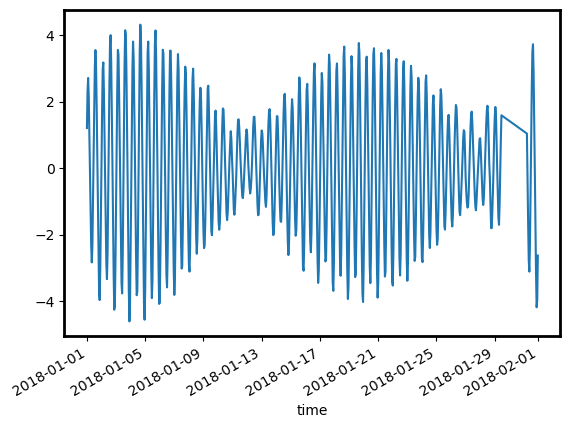

In [5]:
gauge_df.reset_index("site_code").sea_level.plot()

## Validation against GESLA tide gauges
Now we have modelled some tides and loaded some measured sea-level data, we can compare them. 
Note that because the timeseries above is missing some data in late January, we need to "join" our modelled `modelled_df` data to the timesteps present in `gauge_df`.

Now let's generate a scatterplot with our measured data on the x-axis, and our modelled tides on the y-axis:

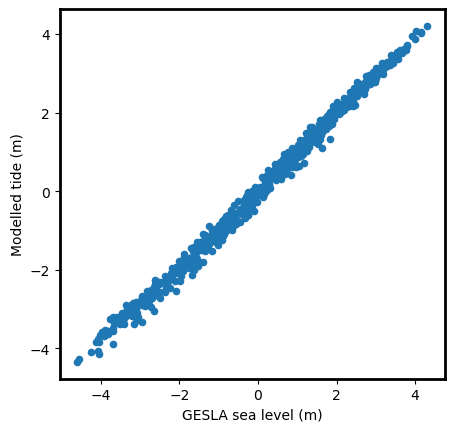

In [6]:
from eo_tides.validation import eval_metrics

# Join our modelled data to the timesteps in our gauge data to enture 1:1 match
joined_df = gauge_df.join(modelled_df)

# Plot as a scatterplot
ax = joined_df.plot.scatter(x="sea_level", y="tide_height")
ax.set_aspect(1.0)
ax.set_ylabel("Modelled tide (m)")
ax.set_xlabel("GESLA sea level (m)");


We can see that both datasets are highly correlated.
To quantify this, we can compare them directly and calculate some useful accuracy statistics, including Root Mean Square Error (RMSE), Mean Absolute Error (MAE), R-squared and bias.

Our results show that our modelled tides closely reproduced observed sea levels at this location.

In [7]:
# Calculate accuracy metrics
accuracy_metrics = eval_metrics(x=joined_df.sea_level, y=joined_df.tide_height)
accuracy_metrics

Correlation         0.997
RMSE                0.159
MAE                 0.126
R-squared           0.994
Bias               -0.005
Regression slope    0.979
dtype: float64

## Identifying best local tide models
Because different ocean tide models can perform better or worse in different locations, it can be valuable to compare the accuracy of different models against measured gauge data.
This can help us make an informed decision about the best model to use for a given application or study area.

In the example below, we will use `model_tides` to model tides using three different models: `EOT20`, `GOT5.5`, and `HAMTIDE11`.

In [8]:
models = ["EOT20", "GOT5.5", "HAMTIDE11"]

modelled_df = model_tides(
    x=x,
    y=y,
    time=pd.date_range(start=start_time, end=end_time, freq="1h"),
    model=models,
    output_format="wide",
    directory=directory,
)
modelled_df.head()

Modelling tides using EOT20, GOT5.5, HAMTIDE11 in parallel


100%|██████████| 3/3 [00:00<00:00, 12.09it/s]


Converting to a wide format dataframe


,,tide_model,EOT20,GOT5.5,HAMTIDE11
time,x,y,,,
2018-01-01 00:00:00,122.2186,-18.0008,1.229286,1.292904,1.422702
2018-01-01 01:00:00,122.2186,-18.0008,2.162897,2.290366,2.302042
2018-01-01 02:00:00,122.2186,-18.0008,2.476600,2.629404,2.537032
2018-01-01 03:00:00,122.2186,-18.0008,2.112390,2.244390,2.072846
2018-01-01 04:00:00,122.2186,-18.0008,1.181283,1.258280,1.034931


We can now merge these modelled tides with our measured gauge data:

<Axes: xlabel='time'>

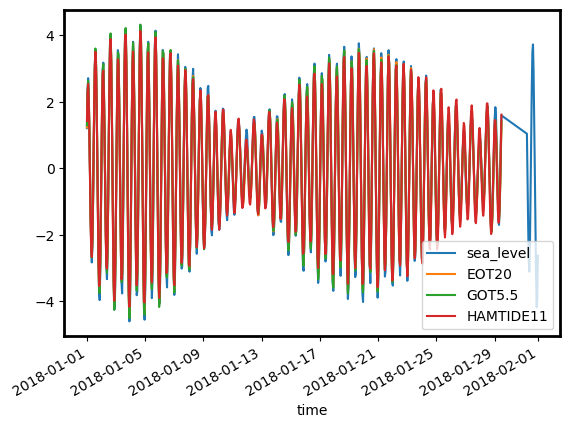

In [9]:
# Join our modelled data to the timesteps in our gauge data to enture 1:1 match
joined_df = gauge_df.join(modelled_df)

# Plot measured sea levels and modelled data
joined_df.reset_index(["site_code", "x", "y"])[["sea_level"] + models].plot()

Now, we can loop through each of our models and calculate accuracy metrics compared to our gauge data for each of them:

In [10]:
# Calculate accuracy metrics for each model
accuracy_dict = {}
for model in models:
    accuracy_dict[model] = eval_metrics(x=joined_df.sea_level, y=joined_df[model])

# Merge into a single dataframe
combined_accuracy_df = pd.DataFrame.from_dict(accuracy_dict)
combined_accuracy_df

,EOT20,GOT5.5,HAMTIDE11
Correlation,0.997,0.997,0.993
RMSE,0.159,0.152,0.239
MAE,0.126,0.118,0.193
R-squared,0.994,0.994,0.986
Bias,-0.005,-0.010,-0.011
Regression slope,0.979,0.996,0.963


As we can see above, at this location `GOT5.5` has the best overall accuracy as measured by RMSE and MAE, while results from `HAMTIDE11` are less accurate and slightly less correlated with our measured gauge data.